In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, confusion_matrix, average_precision_score

# Generate datasets
X_moons, y_moons = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_moons_2, y_moons_2 = make_moons(n_samples=1500, noise=0.4, random_state=42)
X_circles, y_circles = make_circles(n_samples=1000, noise=0.2, factor=0.5, random_state=42)
X_blobs, y_blobs = make_blobs(n_samples=1000, centers=2, cluster_std=1.0, random_state=42)


In [13]:
def train_decision_tree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    dt_classifier = DecisionTreeClassifier(max_depth=3)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    return dt_classifier, y_test, y_pred

dt_moons, y_moons_test, y_moons_pred = train_decision_tree(X_moons, y_moons)
dt_moons_2, y_moons_test_2, y_moons_pred_2 = train_decision_tree(X_moons_2, y_moons_2)
dt_circles, y_circles_test, y_circles_pred = train_decision_tree(X_circles, y_circles)
dt_blobs, y_blobs_test, y_blobs_pred = train_decision_tree(X_blobs, y_blobs)


In [14]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_moons, y_moons)  # Use any dataset (moons, circles, or blobs)
rf_classifier.fit(X_moons_2, y_moons_2)
y_rf_pred_2 = rf_classifier.predict(X_moons_2)


In [15]:
from sklearn.svm import SVC  
svc_classifier = SVC(probability=True, kernel='linear')
abc_classifier = AdaBoostClassifier(n_estimators=50, base_estimator=svc_classifier, learning_rate=1)
abc_classifier.fit(X_moons, y_moons)  # Use any dataset (moons, circles, or blobs)
abc_classifier.fit(X_moons_2, y_moons_2)
y_abc_pred = abc_classifier.predict(X_moons)
y_abc_pred_2 = abc_classifier.predict(X_moons_2)


/home/umakant/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/home/umakant/.local/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [16]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_moons, y_moons)  # Use any dataset (moons, circles, or blobs)
gb_classifier.fit(X_moons_2, y_moons_2)
y_gb_pred = gb_classifier.predict(X_moons)
y_gb_pred_2 = gb_classifier.predict(X_moons_2)


For moon datasets Descion Tree
Precision-Recall Curve: [0.5        0.91304348 1.        ]
Accuracy: 0.8800
Confusion Matrix:
[[92  8]
 [16 84]]
Average Precision: 0.8470


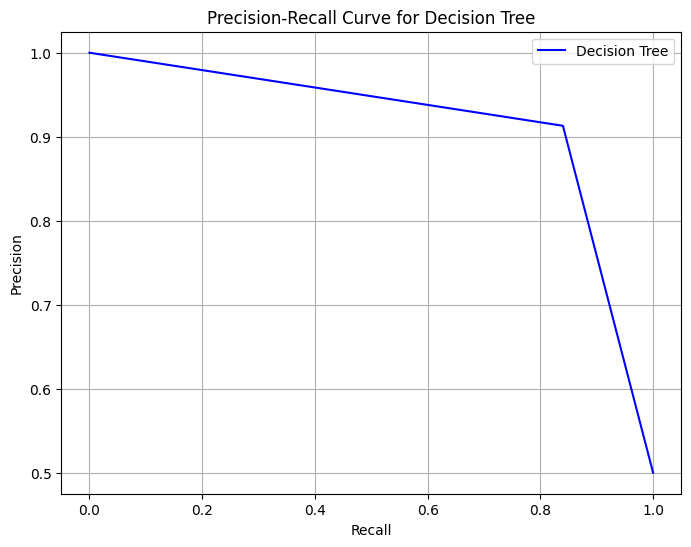

For moon datasets Random Forest
Precision-Recall Curve: [0.5       0.8954918 1.       ]
Accuracy: 0.8860
Confusion Matrix:
[[449  51]
 [ 63 437]]
Average Precision: 0.8457


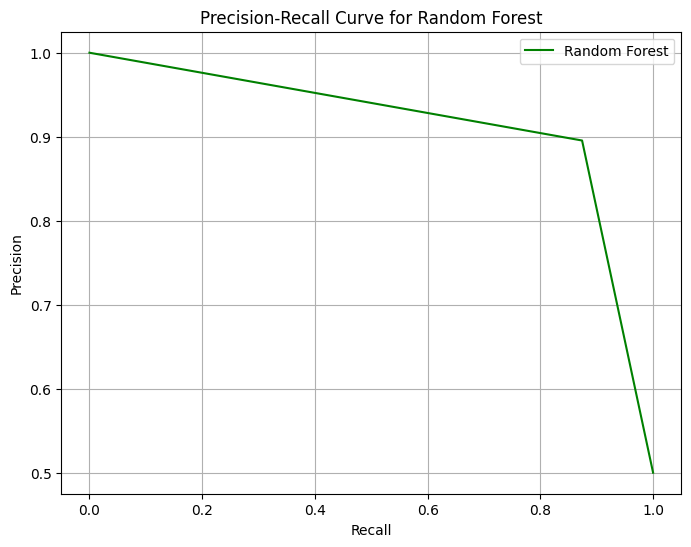

For moon datasets Adaboost classifer
Precision-Recall Curve: [0.5        0.73297491 1.        ]
Accuracy: 0.7600
Confusion Matrix:
[[351 149]
 [ 91 409]]
Average Precision: 0.6906


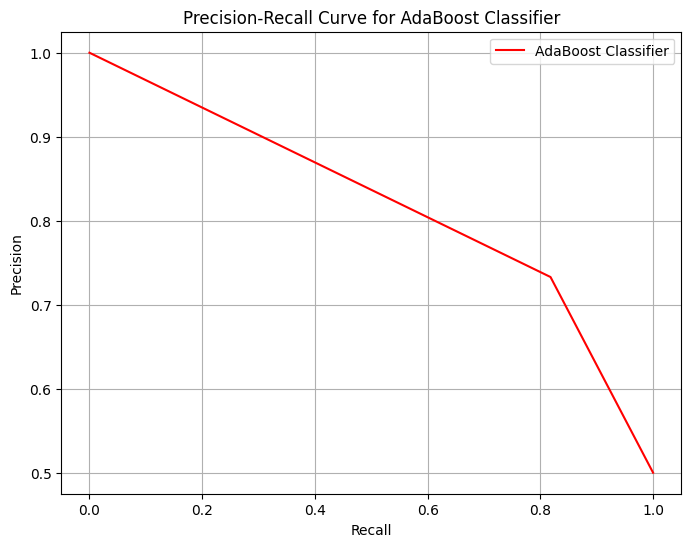

For moon datasets Gradiet Boost
Precision-Recall Curve: [0.5        0.90650407 1.        ]
Accuracy: 0.9000
Confusion Matrix:
[[454  46]
 [ 54 446]]
Average Precision: 0.8626


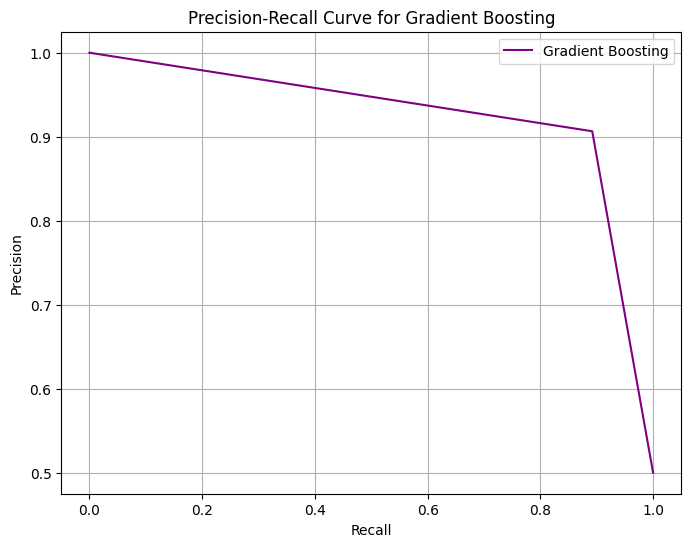

For Second parameters
For moon datasets Descion Tree
Precision-Recall Curve: [0.46666667 0.80519481 1.        ]
Accuracy: 0.8467
Confusion Matrix:
[[130  30]
 [ 16 124]]
Average Precision: 0.7665


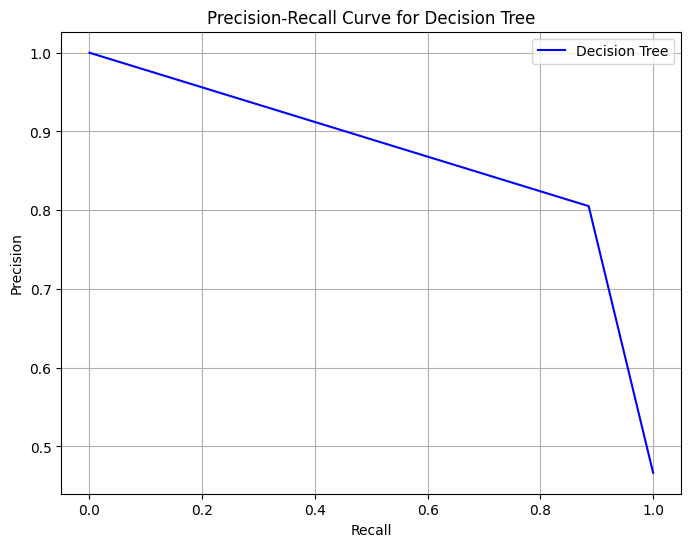

For moon datasets Random Forest
Precision-Recall Curve: [0.5 1.  1. ]
Accuracy: 1.0000
Confusion Matrix:
[[750   0]
 [  0 750]]
Average Precision: 1.0000


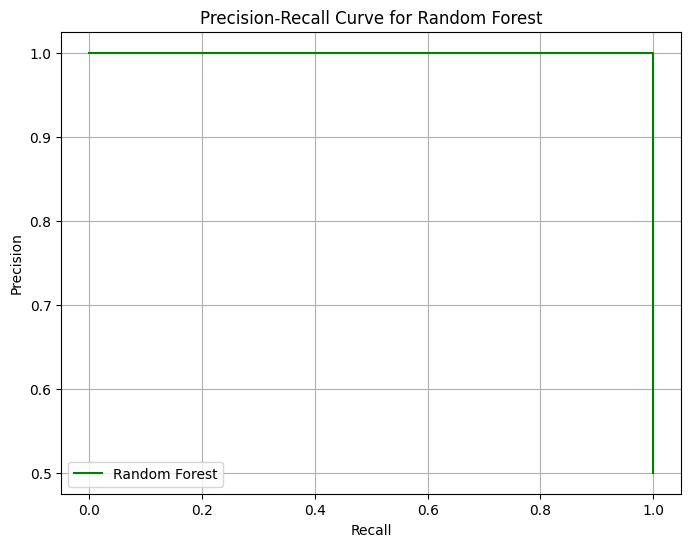

For moon datasets Adaboost classifer
Precision-Recall Curve: [0.5        0.71356784 1.        ]
Accuracy: 0.7267
Confusion Matrix:
[[522 228]
 [182 568]]
Average Precision: 0.6617


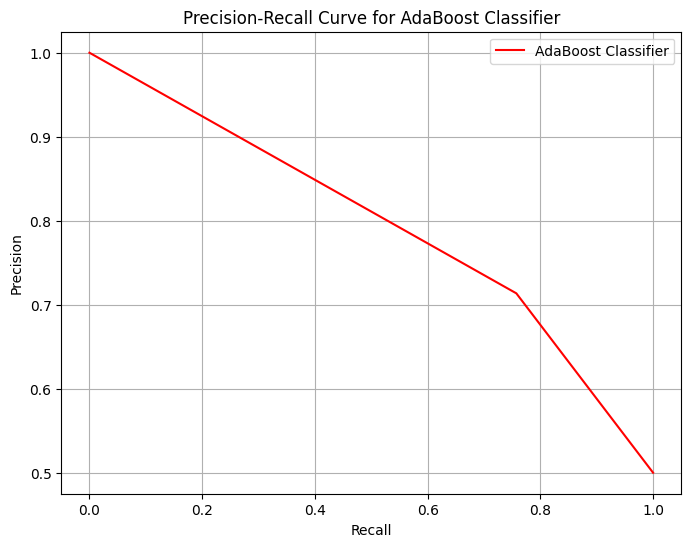

For moon datasets Gradiet Boost
Precision-Recall Curve: [0.5        0.90214477 1.        ]
Accuracy: 0.9000
Confusion Matrix:
[[677  73]
 [ 77 673]]
Average Precision: 0.8609


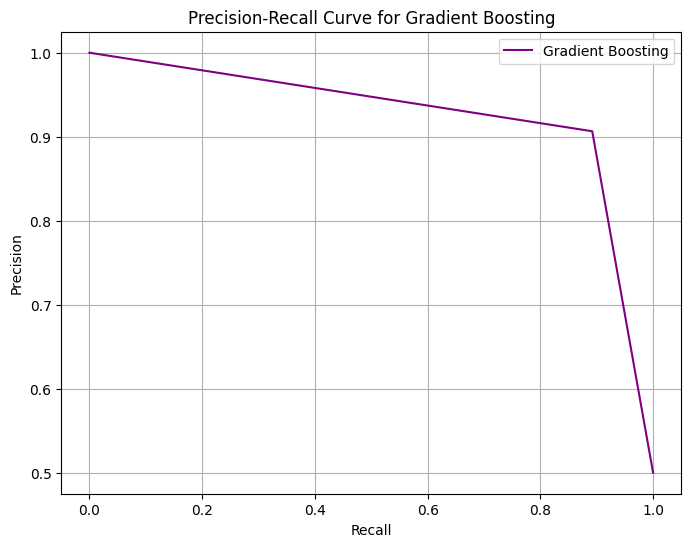

In [18]:
from sklearn.metrics import precision_recall_curve
def evaluate_model(y_true, y_pred):
    pr_curve, _, _ = precision_recall_curve(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    avg_precision = average_precision_score(y_true, y_pred)
    print(f"Precision-Recall Curve: {pr_curve}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Average Precision: {avg_precision:.4f}")
    return pr_curve, accuracy, confusion, avg_precision


print("For moon datasets Descion Tree")

pr_curve_dt, acc_dt, conf_dt, avg_prec_dt = evaluate_model(y_moons_test, y_moons_pred)

precision_dt, recall_dt, _ = precision_recall_curve(y_moons_test, y_moons_pred)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, color='b', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.grid(True)
plt.legend()
plt.show()


print("For moon datasets Random Forest")

pr_curve_rf, acc_rf, conf_rf, avg_prec_rf = evaluate_model(y_moons, y_rf_pred)

precision_rf, recall_rf, _ = precision_recall_curve(y_moons, y_rf_pred)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='g', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.grid(True)
plt.legend()
plt.show()
print("For moon datasets Adaboost classifer")

pr_curve_abc, acc_abc, conf_abc, avg_prec_abc = evaluate_model(y_moons, y_abc_pred)

precision_abc, recall_abc, _ = precision_recall_curve(y_moons, y_abc_pred)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_abc, precision_abc, color='r', label='AdaBoost Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost Classifier')
plt.grid(True)
plt.legend()
plt.show()
print("For moon datasets Gradiet Boost")

pr_curve_gb, acc_gb, conf_gb, avg_prec_gb = evaluate_model(y_moons, y_gb_pred)
precision_gb, recall_gb, _ = precision_recall_curve(y_moons, y_gb_pred)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, color='purple', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.grid(True)
plt.legend()
plt.show()




print("For Second parameters")

print("For moon datasets Descion Tree")

pr_curve_dt, acc_dt, conf_dt, avg_prec_dt = evaluate_model(y_moons_test_2, y_moons_pred_2)

precision_dt, recall_dt, _ = precision_recall_curve(y_moons_test_2, y_moons_pred_2)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_dt, precision_dt, color='b', label='Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.grid(True)
plt.legend()
plt.show()


print("For moon datasets Random Forest")

pr_curve_rf, acc_rf, conf_rf, avg_prec_rf = evaluate_model(y_moons_2, y_rf_pred_2)

precision_rf, recall_rf, _ = precision_recall_curve(y_moons_2, y_rf_pred_2)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='g', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.grid(True)
plt.legend()
plt.show()
print("For moon datasets Adaboost classifer")

pr_curve_abc, acc_abc, conf_abc, avg_prec_abc = evaluate_model(y_moons_2, y_abc_pred_2)

precision_abc, recall_abc, _ = precision_recall_curve(y_moons_2, y_abc_pred_2)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_abc, precision_abc, color='r', label='AdaBoost Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for AdaBoost Classifier')
plt.grid(True)
plt.legend()
plt.show()
print("For moon datasets Gradiet Boost")

pr_curve_gb, acc_gb, conf_gb, avg_prec_gb = evaluate_model(y_moons_2, y_gb_pred_2)
precision_gb, recall_gb, _ = precision_recall_curve(y_moons, y_gb_pred)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, color='purple', label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.grid(True)
plt.legend()
plt.show()




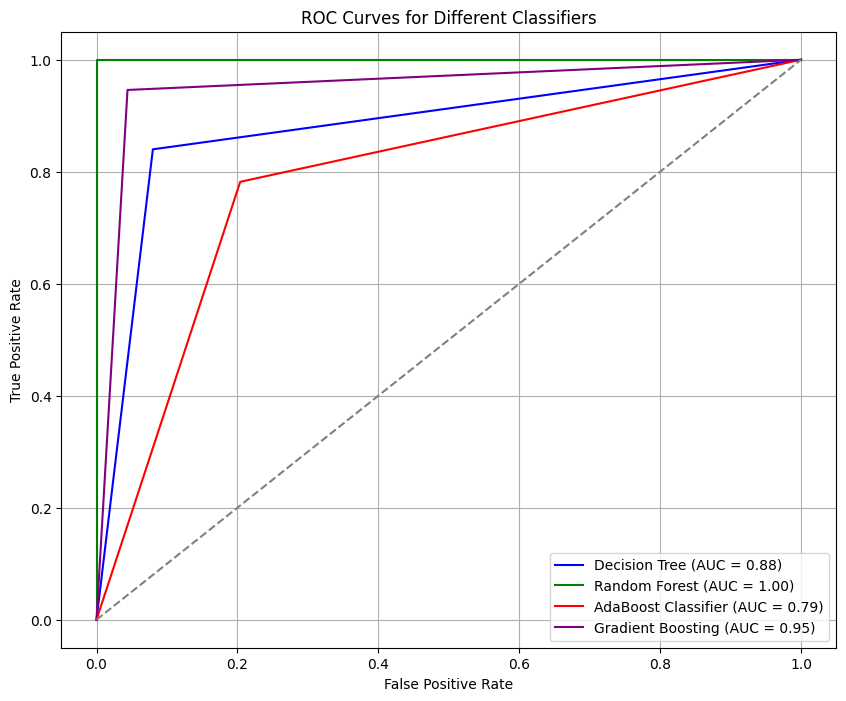

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_moons_test, y_moons_pred)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_moons, y_rf_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve for AdaBoost Classifier
fpr_abc, tpr_abc, _ = roc_curve(y_moons, y_abc_pred)
roc_auc_abc = auc(fpr_abc, tpr_abc)

# Calculate ROC curve for Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_moons, y_gb_pred)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='b', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='g', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_abc, tpr_abc, color='r', label=f'AdaBoost Classifier (AUC = {roc_auc_abc:.2f})')
plt.plot(fpr_gb, tpr_gb, color='purple', label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend()
plt.grid(True)
plt.show()
